<a href="https://colab.research.google.com/github/changdaeoh/HandsOn_ML/blob/main/EX5_svm_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM classifier for MNIST

### data load

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [2]:
import numpy as np

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]


from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_std = StandardScaler() 
scaler_mm = MinMaxScaler() 

X_train_std = scaler_std.fit_transform(X_train.astype(np.float32))
X_train_mm = scaler_mm.fit_transform(X_train.astype(np.float32))
X_test_std = scaler_std.transform(X_test.astype(np.float32))
X_test_mm = scaler_mm.transform(X_test.astype(np.float32))

In [12]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000,) (10000,)


In [4]:
# compare two scalers

from sklearn.svm import LinearSVC

can1 = LinearSVC()
can1.fit(X_train_std[:5000], y_train[:5000])
print(can1.score(X_test_std[:2500], y_test[:2500]))

can2 = LinearSVC()
can2.fit(X_train_mm[:5000], y_train[:5000])
print(can2.score(X_test_mm[:2500], y_test[:2500]))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7728
0.8316


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### candidate 1. Linear SVC

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model init
lin_svc = LinearSVC(max_iter = 10000, multi_class = "ovr",
                    random_state = 0)

# hyper parameter grid & grid searcher define
linear_svc_grid = {'C' : [10**i for i in range(-3, 4)],
                   'loss' : ['hinge', 'squared_hinge']}
rs = RandomizedSearchCV(lin_svc, linear_svc_grid, n_iter = 20, scoring = "accuracy",
                        random_state = 0, cv = 3, n_jobs = -1)

In [7]:
# 파라미터 튜닝시간을 줄이기 위해 극소량의 데이터만 사용하여 서치
rs.fit(X_train_mm[:2000], y_train[:2000])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 14 is smaller than n_iter=20. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=10000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=0, tol=0.0001, verbose=0),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'loss': ['hinge', 'squared_hinge']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [22]:
print('best model             :',rs.best_estimator_,'\n')
print('best test subset score :',rs.best_score_)

best model             : LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0) 

best test subset score : 0.8695096895996445


In [8]:
# fit best linear svc model
rs.best_estimator_.fit(X_train_mm, y_train)

rs.best_estimator_.score(X_test_mm, y_test)

0.9172

### candidate 2. Kernel SVM

In [22]:
# model init
ksvm = SVC(max_iter = 10000, decision_function_shape = "ovr",
           random_state = 0)

# hyper parameter grid & grid searcher define
ksvm_grid = {'C' : list(np.logspace(-3, 3, 30)),
             'gamma' : list(np.logspace(-3, 3, 30))}

ksvm_rs = RandomizedSearchCV(ksvm, ksvm_grid, n_iter = 30, scoring = "accuracy",
                             random_state = 0, cv = 3, n_jobs = -1)

In [23]:
ksvm_rs.fit(X_train_mm[:2500], y_train[:2500])

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=10000,
                                 probability=False, random_state=0,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.00161...
                                                  2.0433597178569416,
                                                  3.2903445623126677,
                                                  5.298316906283707,
                                                  8.531678524172806,
                                                  13.738237958832638,
                                                  22.1

In [24]:
print('best model             :',ksvm_rs.best_estimator_,'\n')
print('best test subset score :',ksvm_rs.best_score_)

best model             : SVC(C=1.2689610031679222, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.04520353656360243, kernel='rbf', max_iter=10000, probability=False,
    random_state=0, shrinking=True, tol=0.001, verbose=False) 

best test subset score : 0.9240002955618699


In [25]:
ksvm_rs.best_estimator_.fit(X_train_mm, y_train)

ksvm_rs.best_estimator_.score(X_test_mm, y_test)

0.9836

In [ ]:
y_pred = ksvm_rs.best_estimator_.predict(X_test_mm)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [i for i in range(10)]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



### candidate 3. CNN

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# shape setting
img_rows = 28
img_cols = 28

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# min max scaling
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# hyperparameter set
batch_size = 128
num_classes = 10
epochs = 30

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


In [50]:
model = Sequential()
model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(250, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# from tensorflow.keras.utils import plot_model
# plot_model(model, './cnn.png', show_shapes=True)

In [41]:
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs = epochs,
                 validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 3s 5ms/step - loss: 0.4845 - accuracy: 0.8364 - val_loss: 0.0474 - val_accuracy: 0.9844
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0557 - accuracy: 0.9821 - val_loss: 0.0365 - val_accuracy: 0.9885
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0386 - val_accuracy: 0.9875
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0293 - accuracy: 0.9910 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0276 - val_accuracy: 0.9908
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0207 - val_accuracy: 0.9936
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0240 - val_accuracy: 0.9925
Epoch 

# SVM Regression house price prediction

### DATA LOAD

In [42]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler, RobustScaler

scaler1 = StandardScaler()
X_train_std = scaler1.fit_transform(X_train)
X_test_std = scaler1.transform(X_test)

scaler2 = RobustScaler()
X_train_rb = scaler2.fit_transform(X_train)
X_test_rb = scaler2.transform(X_test)

In [43]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(16512, 8) (4128, 8)
(16512,) (4128,)


In [49]:
# 전처리방법 성능비교 - 차이없음
from sklearn.svm import LinearSVR

can1 = LinearSVR(max_iter=10000)
can2 = LinearSVR(max_iter=10000)

pred1 = can1.fit(X_train_std[:10000], y_train[:10000]).predict(X_test_std)
pred2 = can2.fit(X_train_rb[:10000], y_train[:10000]).predict(X_test_rb)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(pred1,y_test))
print(mean_squared_error(pred2,y_test))

0.5794043512385878
0.5798144304017645


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


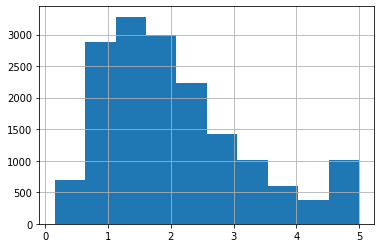

In [55]:
import pandas as pd
pd.Series(y_train).hist()

### candidate 1. Linear SVR

In [56]:
lin_svr = LinearSVR(max_iter=10000, random_state = 0)

# hyper parameter grid & grid searcher define
linear_svr_grid = {'C' : list(np.logspace(-3, 3, 30)),
                   'epsilon' : [0.005, 0.001, 0.0005, 0.0001, 0.0]}
rs = RandomizedSearchCV(lin_svr, linear_svr_grid, scoring = "neg_root_mean_squared_error",
                        n_iter = 30, random_state = 0, cv = 3, n_jobs = -1)

rs.fit(X_train_rb[:10000], y_train[:10000])
print('best model             :',rs.best_estimator_,'\n')
print('best test subset score :',rs.best_score_)

best model             : LinearSVR(C=0.0016102620275609393, dual=True, epsilon=0.0005,
          fit_intercept=True, intercept_scaling=1.0, loss='epsilon_insensitive',
          max_iter=10000, random_state=0, tol=0.0001, verbose=0) 

best test subset score : -1.4966171997043716


In [57]:
rs.best_estimator_.fit(X_train_rb, y_train)
print(rs.best_estimator_.score(X_test_rb, y_test))  # 결정계수
y_pred = rs.best_estimator_.predict(X_test_rb)
print(np.sqrt(mean_squared_error(y_test, y_pred)))  # rmse

0.5221515356857137
0.7913134131784112


In [58]:
print(mean_squared_error(y_test, y_pred))

0.6261769178760669


### candidate 2. Kernel SVR

In [61]:
from sklearn.svm import SVR

# model init
ksvr = SVR(max_iter = 10000)

# hyper parameter grid & grid searcher define
ksvr_grid = {'C' : list(np.logspace(-3, 3, 30)),
             'gamma' : list(np.logspace(-3, 3, 30)),
             'epsilon' : [0.005, 0.001, 0.0005, 0.0001, 0.0]}

ksvr_rs = RandomizedSearchCV(ksvr, ksvr_grid, scoring = "neg_root_mean_squared_error",
                             n_iter = 60, random_state = 0, cv = 3, n_jobs = -1)


ksvr_rs.fit(X_train_rb[:3000], y_train[:3000])

print('best model             :',ksvr_rs.best_estimator_,'\n')
print('best test subset score :',ksvr_rs.best_score_)

ksvr_rs.best_estimator_.fit(X_train_rb, y_train)
print(ksvr_rs.best_estimator_.score(X_test_rb, y_test))  # 결정계수
y_pred = ksvr_rs.best_estimator_.predict(X_test_rb)
print(mean_squared_error(y_test, y_pred))           # mse
print(np.sqrt(mean_squared_error(y_test, y_pred)))  # rmse

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


best model             : SVR(C=3.2903445623126677, cache_size=200, coef0=0.0, degree=3, epsilon=0.005,
    gamma=0.11721022975334805, kernel='rbf', max_iter=10000, shrinking=True,
    tol=0.001, verbose=False) 

best test subset score : -0.6146204134525454


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.7332173655452494
0.34959435942826506
0.5912650500649138


### candidate 3. DNN

In [66]:
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import regularizers

In [79]:
model = Sequential([
                    InputLayer(input_shape = (8)),
                    Dense(30, activation = "tanh"),
                    Dense(20, activation = "tanh"),
                    Dense(15, activation = "tanh"),
                    Dense(10, activation = "tanh"),
                    Dense(1)
])

model.compile(loss='mse', optimizer='adam')


model.fit(X_train_rb, y_train,
          epochs = epochs,
          batch_size = batch_size,
          verbose = 0,
          validation_data = (X_test_rb, y_test))

model.evaluate(X_test_rb, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3035


0.3034811019897461

In [81]:
model = Sequential([
                    InputLayer(input_shape = (8)),
                    Dense(30, activation = "sigmoid"),
                    Dense(20, activation = "sigmoid"),
                    Dense(15, activation = "sigmoid"),
                    Dense(10, activation = "sigmoid"),
                    Dense(1)
])

model.compile(loss='mse', optimizer='adam')


model.fit(X_train_rb, y_train,
          epochs = epochs,
          batch_size = batch_size,
          verbose = 0,
          validation_data = (X_test_rb, y_test))

model.evaluate(X_test_rb, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3570


0.3569640815258026

In [78]:
model = Sequential([
                    InputLayer(input_shape = (8)),
                    Dense(30, activation = "relu"),
                    Dense(20, activation = "relu"),
                    Dense(15, activation = "relu"),
                    Dense(10, activation = "relu"),
                    Dense(1)
])

model.compile(loss='mse', optimizer='adam')


model.fit(X_train_rb, y_train,
          epochs = epochs,
          batch_size = batch_size,
          verbose = 0,
          validation_data = (X_test_rb, y_test))

model.evaluate(X_test_rb, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3284


0.3283582925796509

In [86]:
model = Sequential([
                    InputLayer(input_shape = (8)),
                    Dense(30, activation = "tanh"),
                    Dense(30, activation = "tanh"),
                    Dense(30, activation = "tanh"),
                    Dense(10, activation = "tanh"),
                    Dense(1)
])

model.compile(loss='mse', optimizer='adam')


model.fit(X_train_rb, y_train,
          epochs = epochs,
          batch_size = batch_size,
          verbose = 0,
          validation_data = (X_test_rb, y_test))

model.evaluate(X_test_rb, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.2944


0.2944106459617615